In [107]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

In [3]:
random.seed(42)

In [16]:
df = pd.read_csv('price_indicies.csv')

In [17]:
df.head()

,City,Price_Index,Basic lunchtime menu (including a drink) in the business district,Combo meal in fast food restaurant (big mac meal or similar),500 gr (1 lb.) of boneless chicken breast,1 liter (1 qt.) of whole fat milk,"12 eggs, large",1 kg (2 lb.) of tomatoes,500 gr (16 oz.) of local cheese,1 kg (2 lb.) of apples,...,2 tickets to the movies,2 tickets to the theater (best available seats),"Dinner for two at an italian restaurant in the expat area including appetisers, main course, wine and dessert",1 cocktail drink in downtown club,Cappuccino in expat area of the city,1 beer in neighbourhood pub (500ml or 1pt.),Ipad wi-fi 128gb,1 min. of prepaid mobile tariff (no discounts or plans),1 month of gym membership in business district,1 package of marlboro cigarettes
0,"Zurich, Switzerland",255,29.0,15.0,12.00,1.98,8.00,3.88,10.0,3.80,...,36.0,283,105,18.0,5.63,8.0,536,0.44,131,9.0
1,"Grand Cayman, Cayman Islands",253,19.0,10.0,6.00,3.21,5.63,8.00,8.0,7.00,...,33.0,56,106,13.0,6.00,7.0,635,0.41,79,12.0
2,"San Francisco, California, United States",239,20.0,10.0,7.00,1.23,4.46,7.00,7.0,6.00,...,30.0,263,94,14.0,4.79,7.0,426,0.14,83,12.0
3,"New York City, United States",238,19.0,9.0,6.00,1.11,3.63,4.62,7.0,3.73,...,31.0,397,113,17.0,5.12,7.0,423,0.48,74,14.0
4,"London, United Kingdom",238,17.0,8.0,5.18,1.31,3.76,2.69,7.0,3.07,...,33.0,293,101,15.0,4.53,8.0,683,0.47,66,17.0


In [18]:
# drop nulls for now
df = df.dropna()
df.shape

(160, 54)

# Split the dataset

In [23]:
train_df = df.sample(frac = 0.8, random_state = 0)
test_df = df.drop(train_df.index)

In [24]:
assert len(train_df) + len(test_df) == len(df)

In [27]:
X_train = train_df.drop(columns = ['City']).copy()
X_test = test_df.drop(columns = ['City']).copy()

y_train = X_train.pop('Price_Index')
y_test = X_test.pop('Price_Index')

y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

In [28]:
X_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Basic lunchtime menu (including a drink) in the business district,128.0,12.748047,5.703008,2.51,8.0000,13.000,17.0000,31.00
Combo meal in fast food restaurant (big mac meal or similar),128.0,7.778594,2.786424,2.16,5.7475,8.000,9.0000,18.00
500 gr (1 lb.) of boneless chicken breast,128.0,4.037031,2.059597,1.22,2.4675,3.925,5.0325,14.00
1 liter (1 qt.) of whole fat milk,128.0,1.183359,0.486633,0.48,0.8475,1.080,1.3425,3.28
"12 eggs, large",128.0,3.013203,1.401884,1.09,1.9575,2.775,3.6550,9.00
1 kg (2 lb.) of tomatoes,128.0,2.564609,1.563275,0.39,1.3225,2.225,3.7475,8.00
500 gr (16 oz.) of local cheese,128.0,5.665703,2.276952,1.78,3.9850,5.730,7.0000,13.00
1 kg (2 lb.) of apples,128.0,2.573047,1.176224,0.40,1.6875,2.465,3.2950,7.00
1 kg (2 lb.) of potatoes,128.0,1.451250,0.704642,0.25,0.9400,1.385,1.7900,3.67
0.5 l (16 oz) domestic beer in the supermarket,128.0,2.082266,1.108763,0.70,1.1350,1.725,2.8125,5.11


# Linear regression with one variable  
- Build a model with one variable --> rent

In [37]:
rent_col_name = 'Monthly rent for 85 m2 (900 sqft) furnished accommodation in expensive area'
rent = X_train[[rent_col_name]]

In [44]:
scale = StandardScaler()
poly = PolynomialFeatures(degree = 1, include_bias = True)
lr = LinearRegression()
rent_model = Pipeline([
    ('scale', scale)
    , ('poly', poly)
    , ('regressor', lr)
])

rent_model.fit(rent, y_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('poly', PolynomialFeatures(degree=1)),
                ('regressor', LinearRegression())])

# Get the predictions and save results

In [114]:
y_pred = rent_model.predict(X_test[[rent_col_name]])

test_results = {}
test_results['rent_model'] = mean_squared_error(y_test, y_pred, squared = False)

# View the models prediction as a function of the input

In [54]:
min_rent = df[rent_col_name].min().astype(int)
max_rent = df[rent_col_name].max().astype(int)
num_steps = max_rent - min_rent + 1

x = np.linspace(min_rent, max_rent, num_steps)
x = x[:, np.newaxis]
y = rent_model.predict(x)

In [55]:
def plot_rent(x, y):
    plt.scatter(train_features[rent_col_name], train_labels, label = 'Data')
    plt.plot(x, y, color = 'k', label = 'Predictions')
    plt.xlabel('Rent')
    plt.ylabel('Price Index')
    plt.legend()

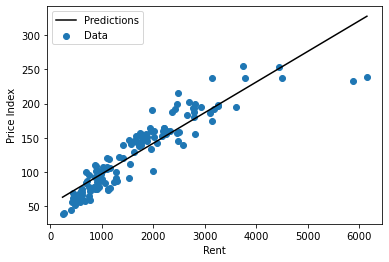

In [56]:
plot_rent(x, y)

# Set up model

In [111]:
scale = StandardScaler()
poly = PolynomialFeatures(degree = 2, include_bias = True)
lr = LinearRegression()
rent_model_deg_2 = Pipeline([
    ('scale', scale)
    , ('poly', poly)
    , ('regressor', lr)
])

rent_model_deg_2.fit(rent, y_train)

Pipeline(steps=[('scale', StandardScaler()), ('poly', PolynomialFeatures()),
                ('regressor', LinearRegression())])

In [118]:
y_pred = rent_model_deg_2.predict(X_test[[rent_col_name]])

test_results['rent_model_deg_2'] = mean_squared_error(y_test, y_pred, squared = False)

In [117]:
min_rent = df[rent_col_name].min().astype(int)
max_rent = df[rent_col_name].max().astype(int)
num_steps = max_rent - min_rent + 1

x = np.linspace(min_rent, max_rent, num_steps)
x = x[:, np.newaxis]
y = rent_model_deg_2.predict(x)

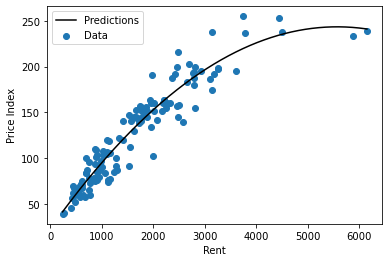

In [90]:
plot_rent(x, y)

# Regression with 3 inputs

In [93]:
fast_food_col_name = 'Combo meal in fast food restaurant (big mac meal or similar)'
rent_col_name = 'Monthly rent for 85 m2 (900 sqft) furnished accommodation in expensive area'
transit_col_name = 'Monthly ticket public transport'

three_features = [fast_food_col_name, rent_col_name, transit_col_name]

features_lst = list(train_features.columns)
fast_food_idx = features_lst.index(fast_food_col_name)
rent_idx = features_lst.index(rent_col_name)
transit_idx = features_lst.index(transit_col_name)

X_train_three_features = X_train[three_features].copy()
X_test_three_features = X_test[three_features].copy()

In [120]:
scale = StandardScaler()
poly = PolynomialFeatures(degree = 1, include_bias = True)
lr = LinearRegression()
three_features_model = Pipeline([
    ('scale', scale)
    , ('poly', poly)
    , ('regressor', lr)
])

three_features_model.fit(X_train_three_features, y_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('poly', PolynomialFeatures(degree=1)),
                ('regressor', LinearRegression())])

# Get the predictions and save results

In [121]:
y_pred = three_features_model.predict(X_test[three_features])

test_results['three_features'] = mean_squared_error(y_test, y_pred, squared = False)

# Regression with 3 inputs, degree 2 polynomial

In [124]:
scale = StandardScaler()
poly = PolynomialFeatures(degree = 2, include_bias = True)
lr = LinearRegression()
three_features_model_deg_2 = Pipeline([
    ('scale', scale)
    , ('poly', poly)
    , ('regressor', lr)
])

three_features_model_deg_2.fit(X_train_three_features, y_train)

Pipeline(steps=[('scale', StandardScaler()), ('poly', PolynomialFeatures()),
                ('regressor', LinearRegression())])

# Get the predictions and save results

In [125]:
y_pred = three_features_model_deg_2.predict(X_test[three_features])

test_results['three_features_deg_2'] = mean_squared_error(y_test, y_pred, squared = False)

# Regression with all features

In [128]:
scale = StandardScaler()
poly = PolynomialFeatures(degree = 1, include_bias = True)
lr = LinearRegression()
all_features = Pipeline([
    ('scale', scale)
    , ('poly', poly)
    , ('regressor', lr)
])

all_features.fit(X_train, y_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('poly', PolynomialFeatures(degree=1)),
                ('regressor', LinearRegression())])

In [129]:
y_pred = all_features.predict(X_test)

test_results['all_features'] = mean_squared_error(y_test, y_pred, squared = False)

In [130]:
results_df = pd.DataFrame(test_results, index  = ['Root Mean Squared Error (Price Index)']).T
results_df

,Root Mean Squared Error (Price Index)
rent_model,17.523999
rent_model_deg_2,17.731312
three_features,9.420725
three_features_deg_2,9.058230
all_features,0.585804


In [147]:
df[filt1].index[0]

81

In [148]:
filt1 = df['City'] == 'Albuquerque, New Mexico, United States'
idx = df[filt1].index[0]
df.at[idx, 'Price_Index']

126

In [149]:
2/158

0.012658227848101266

In [150]:
three_features

['Combo meal in fast food restaurant (big mac meal or similar)',
 'Monthly rent for 85 m2 (900 sqft) furnished accommodation in expensive area',
 'Monthly ticket public transport']